In [164]:
import pyfolio as pf
import matplotlib.pyplot as plt
import numpy as np

In [397]:
# Define the ticker list
tickers_list =  ['^HSI']
#2016 ['NKNCP.ME', 'KZOSP.ME', 'IRAO.ME', 'NLMK.ME', 'SNGS.ME', 'MAGN.ME', 'KZOS.ME', 'NKNC.ME', 'MGTS.ME', 'TATNP.ME', 'LKOH.ME', 'MGTSP.ME', 'MVID.ME', 'MSRS.ME']
# 2017['NKNCP.ME', 'KZOSP.ME', 'TATNP.ME', 'KZOS.ME', 'MAGN.ME', 'MVID.ME', 'MGTSP.ME', 'RASP.ME', 'MGTS.ME', 'RSTI.ME', 'GAZP.ME', 'MSRS.ME', 'LKOH.ME', 'SIBN.ME']
# 2018 ['NKNCP.ME', 'KZOSP.ME', 'SNGS.ME', 'IRAO.ME', 'NKNC.ME', 'GAZP.ME', 'RASP.ME', 'BANE.ME', 'MVID.ME', 'AGRO.ME', 'RSTI.ME', 'LKOH.ME', 'SIBN.ME', 'TATNP.ME']
# 2019 ['KZOSP.ME', 'IRAO.ME', 'OGKB.ME', 'NKNCP.ME', 'LKOH.ME', 'GAZP.ME', 'BANE.ME', 'FEES.ME', 'MSRS.ME', 'TRCN.ME', 'AFKS.ME', 'CHEP.ME', 'NMTP.ME', 'NKNC.ME']
# 2020 ['KZOSP.ME', 'IRAO.ME', 'RASP.ME', 'SNGS.ME', 'FEES.ME', 'PIKK.ME', 'MSNG.ME', 'AFKS.ME', 'RTKMP.ME', 'RTKM.ME', 'OGKB.ME', 'ROSN.ME', 'NVTK.ME', 'FESH.ME']
# Import pandas and create a placeholder for the data
import pandas as pd
data = pd.DataFrame(columns=tickers_list)
# Feth the data
import yfinance as yf
for ticker in tickers_list:
 data[ticker] = yf.download(ticker, start='2011-01-01', end='2011-12-31')['Adj Close']
# Compute the returns of individula stocks and then compute the daily mean returns.
# The mean return is the daily portfolio returns with the above four stocks.
data1 = data.pct_change().mean(axis=1).dropna()
#data = ((data.iloc[-1]-data.iloc[0])/data.iloc[0]).dropna().mean(axis=0)

# Print first 5 rows of the data

[*********************100%***********************]  1 of 1 completed


Start date,2011-01-04
End date,2011-12-30
Total months,11
,Backtest
Annual return,-22.0%
Cumulative returns,-21.3%
Annual volatility,25.6%
Sharpe ratio,-0.84
Calmar ratio,-0.66
Stability,0.81
Max drawdown,-33.5%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,33.45,2011-01-19,2011-10-04,NaT,NaN
1,1.09,2011-01-06,2011-01-10,2011-01-12,5
2,0.53,2011-01-14,2011-01-18,2011-01-19,4
3,0.00,2011-01-04,2011-01-04,2011-01-04,1
4,0.00,2011-01-04,2011-01-04,2011-01-04,1


Stress Events,mean,min,max
US downgrade/European Debt Crisis,-0.47%,-5.66%,3.26%
Fukushima,0.26%,-1.83%,1.73%
Recovery,-0.09%,-5.66%,5.67%


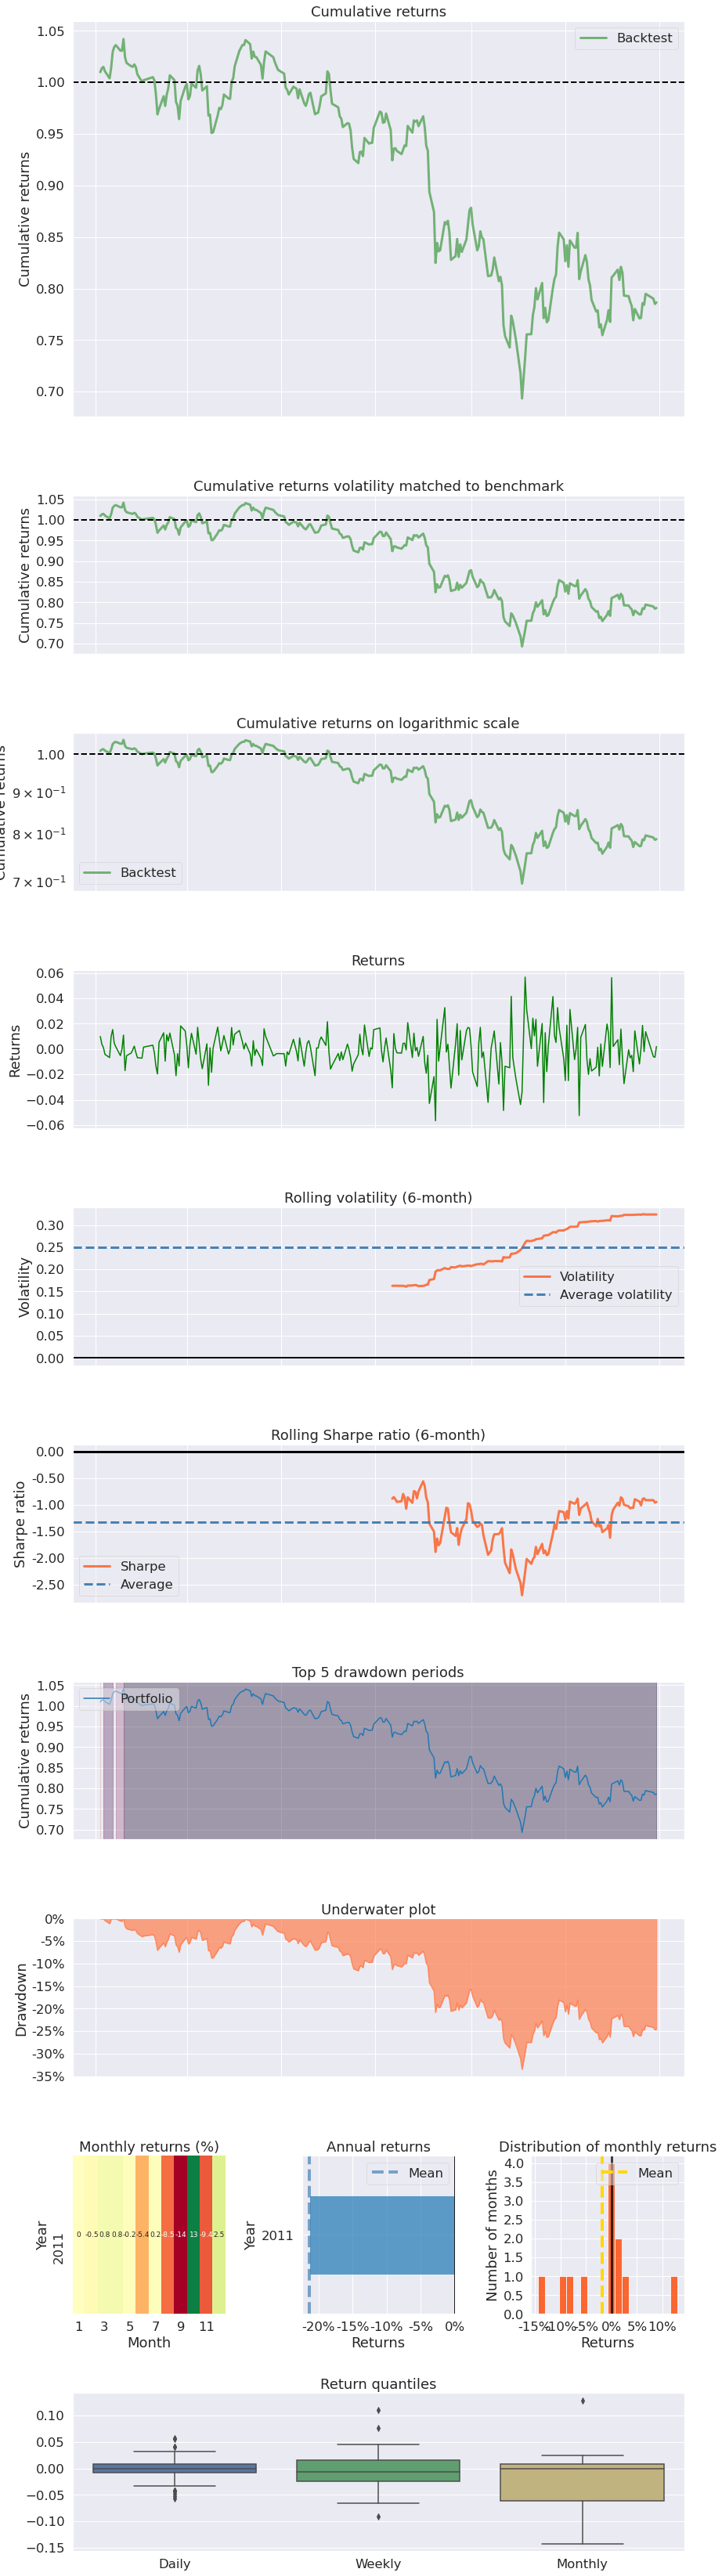

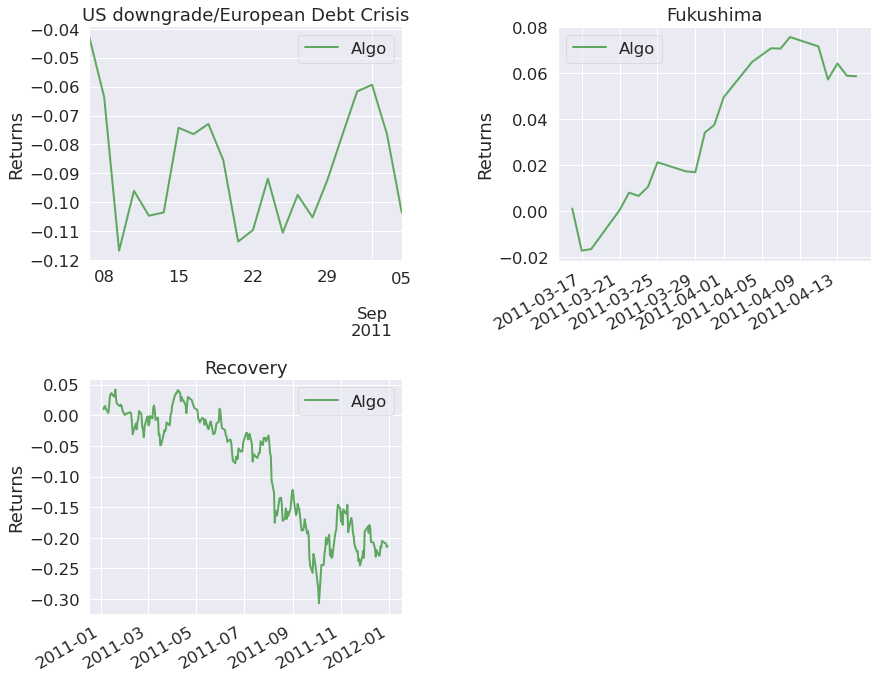

In [398]:
pf.create_full_tear_sheet(data1)

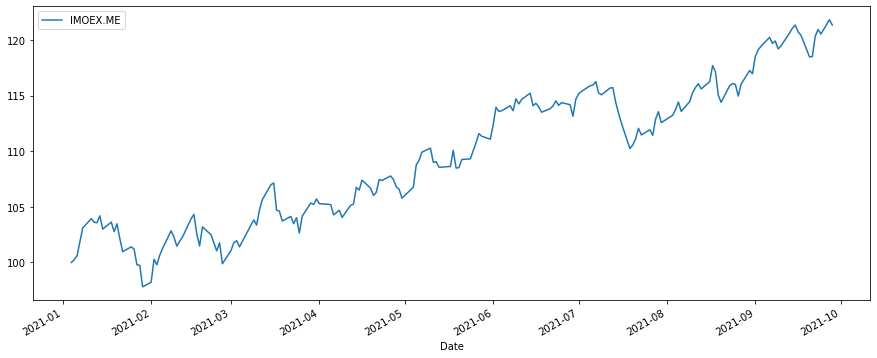

In [258]:
(data / data.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [259]:
ind_returns = (data / data.shift(1)) - 1
annual_ind_returns = ind_returns.mean() * 250 * 100
annual_ind_returns.sort_values(ascending=False)

IMOEX.ME    26.903434
dtype: float64

In [256]:
import empyrical as ep

ep.max_drawdown(data1)*100

-36.66599760475213

The maximum drawdown is -107.73


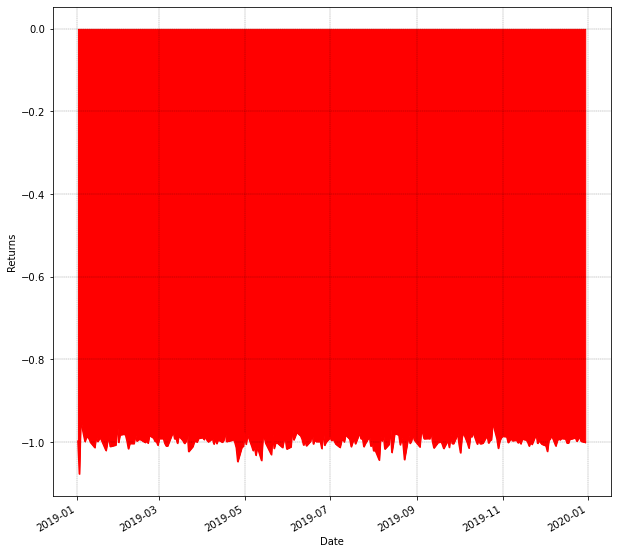

In [206]:
# ----------- Drawdown ------------------    
# Calculate the running maximum
running_max = np.maximum.accumulate(data['123'].dropna())
# Ensure the value never drops below 1
running_max[running_max < 1] = 1
# Calculate the percentage drawdown
drawdown = (data['123'])/running_max - 1
max_dd = drawdown.min()*100
print('The maximum drawdown is %.2f' % max_dd)
# Plot the drawdowns
drawdown.plot(color='r',figsize=(10,10))
plt.ylabel('Returns')
plt.fill_between(drawdown.index, drawdown, color='red')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
plt.show()  

In [424]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper  

class IBapi(EWrapper, EClient):
     def __init__(self):
         EClient.__init__(self, self) 

app = IBapi()
app.connect('127.0.0.1', 7496, 123)
app.run()


ERROR -1 2104 Market data farm connection is OK:hfarm
ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:eufarm
ERROR -1 2104 Market data farm connection is OK:afarm
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usopt
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefil
ERROR -1 1300 Socket port has been reset and this connection is being dropped. Please reconnect on the new port -7497


In [428]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract

import threading
import time


class IBapi(EWrapper, EClient):
	def __init__(self):
		EClient.__init__(self, self)
	def tickPrice(self, reqId, tickType, price, attrib):
		if tickType == 2 and reqId == 1:
			print('The current ask price is: ', price)

def run_loop():
	app.run()

app = IBapi()
app.connect('127.0.0.1', 7497, 123)

#Start the socket in a thread
api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()

time.sleep(1) #Sleep interval to allow time for connection to server

#Create contract object
apple_contract = Contract()
apple_contract.symbol = '1099'
apple_contract.secType = 'CFD'
apple_contract.exchange = 'SMART'
apple_contract.currency = 'HKD'


#Request Market Data
app.reqMktData(1, apple_contract, '', False, False, [])

time.sleep(10) #Sleep interval to allow time for incoming price data
app.disconnect()

ERROR -1 2104 Market data farm connection is OK:hfarm
ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:eufarm
ERROR -1 2104 Market data farm connection is OK:afarm
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usopt
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefil


In [429]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract

import threading
import time

class IBapi(EWrapper, EClient):
	def __init__(self):
		EClient.__init__(self, self)
	def historicalData(self, reqId, bar):
		print(f'Time: {bar.date} Close: {bar.close}')
		
def run_loop():
	app.run()

app = IBapi()
app.connect('127.0.0.1', 7497, 123)

#Start the socket in a thread
api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()

time.sleep(1) #Sleep interval to allow time for connection to server

#Create contract object
eurusd_contract = Contract()
eurusd_contract.symbol = 'EUR'
eurusd_contract.secType = 'CASH'
eurusd_contract.exchange = 'IDEALPRO'
eurusd_contract.currency = 'USD'

#Request historical candles
app.reqHistoricalData(1, eurusd_contract, '', '2 D', '1 hour', 'BID', 0, 2, False, [])

time.sleep(5) #sleep to allow enough time for data to be returned
app.disconnect()

ERROR -1 2104 Market data farm connection is OK:hfarm
ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:eufarm
ERROR -1 2104 Market data farm connection is OK:afarm
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usopt
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefil
ERROR -1 2106 HMDS data farm connection is OK:cashhmds


Time: 1632950100 Close: 1.15969
Time: 1632952800 Close: 1.15983
Time: 1632956400 Close: 1.16015
Time: 1632960000 Close: 1.16035
Time: 1632963600 Close: 1.16039
Time: 1632967200 Close: 1.16071
Time: 1632970800 Close: 1.16039
Time: 1632974400 Close: 1.16079
Time: 1632978000 Close: 1.1595
Time: 1632981600 Close: 1.16061
Time: 1632985200 Close: 1.16045
Time: 1632988800 Close: 1.16041
Time: 1632992400 Close: 1.1598
Time: 1632996000 Close: 1.1571
Time: 1632999600 Close: 1.15755
Time: 1633003200 Close: 1.15907
Time: 1633006800 Close: 1.15854
Time: 1633010400 Close: 1.15887
Time: 1633014000 Close: 1.15778
Time: 1633017600 Close: 1.15707
Time: 1633021200 Close: 1.15686
Time: 1633024800 Close: 1.15845
Time: 1633028400 Close: 1.15832
Time: 1633032000 Close: 1.15804
Time: 1633036500 Close: 1.15813
Time: 1633039200 Close: 1.15806
Time: 1633042800 Close: 1.15738
Time: 1633046400 Close: 1.15651
Time: 1633050000 Close: 1.15757
Time: 1633053600 Close: 1.15773
Time: 1633057200 Close: 1.15758
Time: 16330

In [430]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract

import threading
import time

class IBapi(EWrapper, EClient):
	def __init__(self):
		EClient.__init__(self, self)
		self.data = [] #Initialize variable to store candle

	def historicalData(self, reqId, bar):
		print(f'Time: {bar.date} Close: {bar.close}')
		self.data.append([bar.date, bar.close])
		
def run_loop():
	app.run()

app = IBapi()
app.connect('127.0.0.1', 7497, 123)

#Start the socket in a thread
api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()

time.sleep(1) #Sleep interval to allow time for connection to server

#Create contract object
eurusd_contract = Contract()
eurusd_contract.symbol = 'EUR'
eurusd_contract.secType = 'CASH'
eurusd_contract.exchange = 'IDEALPRO'
eurusd_contract.currency = 'USD'

#Request historical candles
app.reqHistoricalData(1, eurusd_contract, '', '2 D', '1 hour', 'BID', 0, 2, False, [])

time.sleep(5) #sleep to allow enough time for data to be returned

#Working with Pandas DataFrames
import pandas

df = pandas.DataFrame(app.data, columns=['DateTime', 'Close'])
df['DateTime'] = pandas.to_datetime(df['DateTime'],unit='s') 
df.to_csv('EURUSD_Hourly.csv')  

print(df)


app.disconnect()

ERROR -1 2104 Market data farm connection is OK:hfarm
ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:eufarm
ERROR -1 2104 Market data farm connection is OK:afarm
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:cashhmds
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefil


Time: 1632950100 Close: 1.15969
Time: 1632952800 Close: 1.15983
Time: 1632956400 Close: 1.16015
Time: 1632960000 Close: 1.16035
Time: 1632963600 Close: 1.16039
Time: 1632967200 Close: 1.16071
Time: 1632970800 Close: 1.16039
Time: 1632974400 Close: 1.16079
Time: 1632978000 Close: 1.1595
Time: 1632981600 Close: 1.16061
Time: 1632985200 Close: 1.16045
Time: 1632988800 Close: 1.16041
Time: 1632992400 Close: 1.1598
Time: 1632996000 Close: 1.1571
Time: 1632999600 Close: 1.15755
Time: 1633003200 Close: 1.15907
Time: 1633006800 Close: 1.15854
Time: 1633010400 Close: 1.15887
Time: 1633014000 Close: 1.15778
Time: 1633017600 Close: 1.15707
Time: 1633021200 Close: 1.15686
Time: 1633024800 Close: 1.15845
Time: 1633028400 Close: 1.15832
Time: 1633032000 Close: 1.15804
Time: 1633036500 Close: 1.15813
Time: 1633039200 Close: 1.15806
Time: 1633042800 Close: 1.15738
Time: 1633046400 Close: 1.15651
Time: 1633050000 Close: 1.15757
Time: 1633053600 Close: 1.15773
Time: 1633057200 Close: 1.15758
Time: 16330

In [431]:
df['3SMA'] = df['Close'].rolling(3).mean()
print(df.tail(10))

              DateTime    Close      3SMA
24 2021-09-30 21:15:00  1.15813  1.158163
25 2021-09-30 22:00:00  1.15806  1.158077
26 2021-09-30 23:00:00  1.15738  1.157857
27 2021-10-01 00:00:00  1.15651  1.157317
28 2021-10-01 01:00:00  1.15757  1.157153
29 2021-10-01 02:00:00  1.15773  1.157270
30 2021-10-01 03:00:00  1.15758  1.157627
31 2021-10-01 04:00:00  1.15804  1.157783
32 2021-10-01 05:00:00  1.15769  1.157770
33 2021-10-01 06:00:00  1.15772  1.157817


In [437]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
from ibapi.order import *

import threading
import time

class IBapi(EWrapper, EClient):
	def __init__(self):
		EClient.__init__(self, self)

	def nextValidId(self, orderId: int):
		super().nextValidId(orderId)
		self.nextorderId = orderId
		print('The next valid order id is: ', self.nextorderId)

	def orderStatus(self, orderId, status, filled, remaining, avgFullPrice, permId, parentId, lastFillPrice, clientId, whyHeld, mktCapPrice):
		print('orderStatus - orderid:', orderId, 'status:', status, 'filled', filled, 'remaining', remaining, 'lastFillPrice', lastFillPrice)
	
	def openOrder(self, orderId, contract, order, orderState):
		print('openOrder id:', orderId, contract.symbol, contract.secType, '@', contract.exchange, ':', order.action, order.orderType, order.totalQuantity, orderState.status)

	def execDetails(self, reqId, contract, execution):
		print('Order Executed: ', reqId, contract.symbol, contract.secType, contract.currency, execution.execId, execution.orderId, execution.shares, execution.lastLiquidity)


def run_loop():
	app.run()

#Function to create FX Order contract
def FX_order(symbol):
	contract = Contract()
	contract.symbol = symbol[:3]
	contract.secType = 'CASH'
	contract.exchange = 'IDEALPRO'
	contract.currency = symbol[3:]
	return contract

app = IBapi()
app.connect('127.0.0.1', 7497, 123)

app.nextorderId = None

#Start the socket in a thread
api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()

#Check if the API is connected via orderid
while True:
	if isinstance(app.nextorderId, int):
		print('connected')
		break
	else:
		print('waiting for connection')
		time.sleep(1)

#Create order object
order = Order()
order.action = 'BUY'
order.totalQuantity = 10
order.orderType = 'MKT'
order.lmtPrice = '1.30'

#Place order
app.placeOrder(app.nextorderId, FX_order('USDEUR'), order)
#app.nextorderId += 1

time.sleep(3)

#Cancel order 
print('cancelling order')
app.cancelOrder(app.nextorderId)

time.sleep(3)
app.disconnect()

ERROR -1 2104 Market data farm connection is OK:hfarm
ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:eufarm
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:euhmds
ERROR -1 2106 HMDS data farm connection is OK:cashhmds
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefil


The next valid order id is: connected 6



ERROR 6 200 No security definition has been found for the request
ERROR 6 10147 OrderId 6 that needs to be cancelled is not found.


cancelling order
